In [49]:
import numpy as np
import pandas as pd

In [50]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [37]:
# Декодирование отзыва обратно в текст

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [38]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [52]:
# Кодирование последовательностей целых чисел в бинарную матрицу

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [53]:
# Векотризация меток

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [54]:
# Построение модели

from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [57]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.6821 - loss: 0.6314 - val_accuracy: 0.8561 - val_loss: 0.4262
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8951 - loss: 0.3515 - val_accuracy: 0.8828 - val_loss: 0.3110
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9271 - loss: 0.2319 - val_accuracy: 0.8912 - val_loss: 0.2794
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9463 - loss: 0.1723 - val_accuracy: 0.8903 - val_loss: 0.2760
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9617 - loss: 0.1343 - val_accuracy: 0.8845 - val_loss: 0.2859
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9747 - loss: 0.1018 - val_accuracy: 0.8842 - val_loss: 0.3006
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9797 - loss: 0.0845 - val_accuracy: 0.8814 - val_loss: 0.3231
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9878 - loss: 0.0650 - val_accuracy: 0.8809 - v

In [58]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

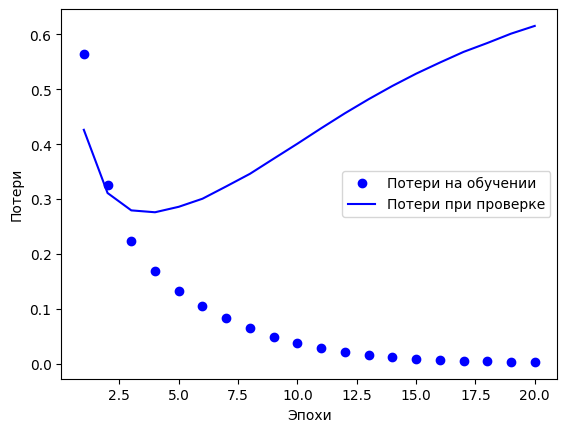

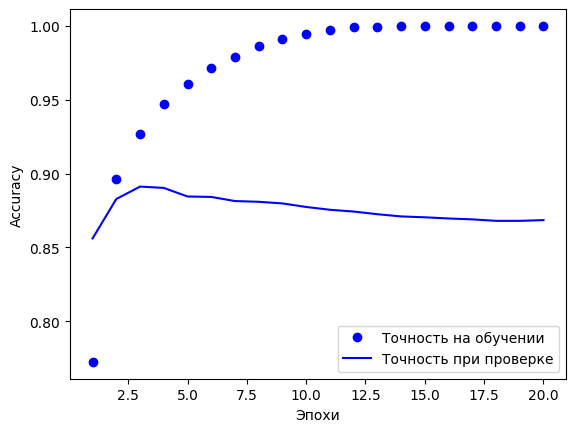

In [59]:
import matplotlib.pyplot as plt

hist_dict = history.history
loss_val = hist_dict['loss']
val_loss_values = hist_dict['val_loss']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, loss_val, 'bo', label='Потери на обучении')
plt.plot(epochs, val_loss_values, 'b', label='Потери при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.figure()
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Обучим модель на новых данных

In [64]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6193 - loss: 0.6171
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8934 - loss: 0.3534
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9195 - loss: 0.2415
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9351 - loss: 0.1955
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8834 - loss: 0.2888


In [65]:
results

[0.2888507843017578, 0.884440004825592]

## Результат/модель

loss = 0.288, accuracy = 0.884

-----------------------
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)

# FineTune 

In [85]:
model = keras.Sequential([
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.7419 - loss: 0.1748 - val_accuracy: 0.8820 - val_loss: 0.0881
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9305 - loss: 0.0568 - val_accuracy: 0.8848 - val_loss: 0.0846
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9633 - loss: 0.0336 - val_accuracy: 0.8801 - val_loss: 0.0886
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9786 - loss: 0.0217 - val_accuracy: 0.8741 - val_loss: 0.0950
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9890 - loss: 0.0127 - val_accuracy: 0.8719 - val_loss: 0.1007
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9907 - loss: 0.0106 - val_accuracy: 0.8705 - val_loss: 0.1040
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9930 - loss: 0.0081 - val_accuracy: 0.8714 - val_loss: 0.1057
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9931 - loss: 0.0076 - val_accuracy: 0.8691 - v

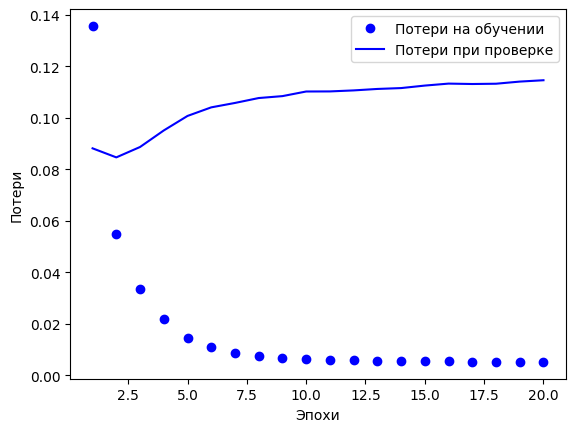

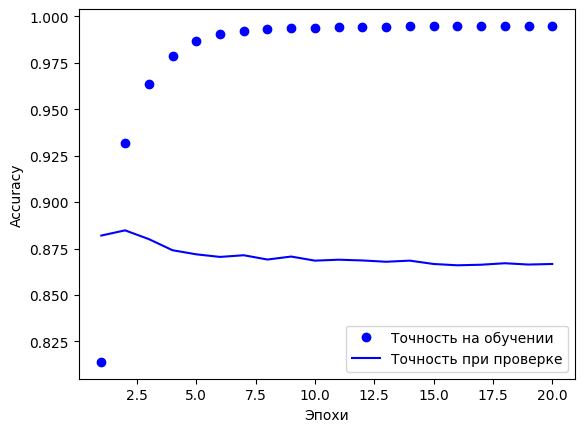

In [86]:
import matplotlib.pyplot as plt

hist_dict = history.history
loss_val = hist_dict['loss']
val_loss_values = hist_dict['val_loss']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, loss_val, 'bo', label='Потери на обучении')
plt.plot(epochs, val_loss_values, 'b', label='Потери при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.figure()
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [135]:
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=2,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6228 - loss: 0.2205
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8988 - loss: 0.0791
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8860 - loss: 0.0840


## Результат/модель

loss = 0.083, accuracy = 0.8876

-----------------------
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=2,
          batch_size=512)

In [96]:
results

[0.09394558519124985, 0.872439980506897]